In [17]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#from matplotlib.finance import date2num
import time
import seaborn as sns

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [18]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [20]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
# Loop through all tweets

twf = pd.DataFrame()
twf.tz_localize('UTC').tz_convert('US/Pacific')
counter = 0
# Create list of Twitter handles
target_terms= ["@BBC", "@CBS" ,"@CNN", "@FoxNews" , "@nytimes"]

for x in target_terms:    
    #print("---------->>>>>>>",x)  
    public_tweets = api.search(x, count=100, result_type="recent")
    #print(public_tweets)
    
    for tweet in public_tweets["statuses"]:
        #print(tweet["text"])
        #Run Vader Analysis on each tweet
        #datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        #print("done")
       # print(tweet["created_at"])
       # print(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y").strftime('%m/%d/%Y %H:%M:%S'))
        twf.loc[counter,'Handle'] = x
        twf.loc[counter,'Date'] = tweet["created_at"]
        twf.loc[counter,'Text'] = tweet["text"]
        twf.loc[counter,'Compound_Score'] = compound
        twf.loc[counter,'Positive_score'] = pos
        twf.loc[counter,'Negative_score'] = neg
        twf.loc[counter,'Neutral_score'] = neu
        #print(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
        counter = counter+1  

        
twf.to_csv("Sentiment_analysis.csv")

#converts the datetime object from a string
twf["Date"]=pd.to_datetime(twf["Date"])

twf.head() 


Handle                Date  \
0   @BBC 2018-04-02 23:22:44   
1   @BBC 2018-04-02 23:22:38   
2   @BBC 2018-04-02 23:22:31   
3   @BBC 2018-04-02 23:22:24   
4   @BBC 2018-04-02 23:22:24   

                                                Text  Compound_Score  \
0  RT @carolecadwalla: Here's the New Yorker cove...          0.0000   
1  @BrutalVeracity @DonnaWe51549635 @Eagle5042584...          0.0000   
2  RT @DrMahmoudRefaat: #Egypt: #Sisi pretends 24...         -0.3818   
3  @DonnaWe51549635 @Eagle50425849 @cjsienna55 @I...          0.0000   
4  RT @carolecadwalla: Here's the New Yorker cove...          0.0000   

   Positive_score  Negative_score  Neutral_score  
0             0.0           0.000          1.000  
1             0.0           0.000          1.000  
2             0.0           0.175          0.825  
3             0.0           0.000          1.000  
4             0.0           0.000          1.000

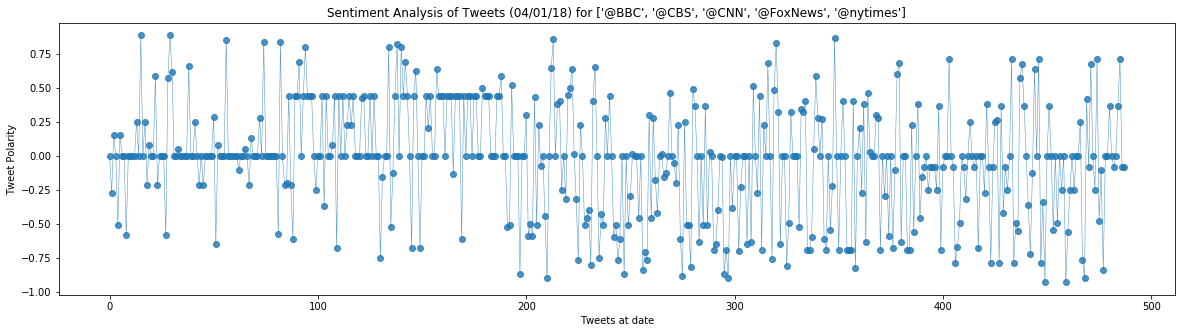

In [7]:
# Create plot
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(twf["Compound_Score"])),
        twf["Compound_Score"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_terms))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets at date")
plt.show()

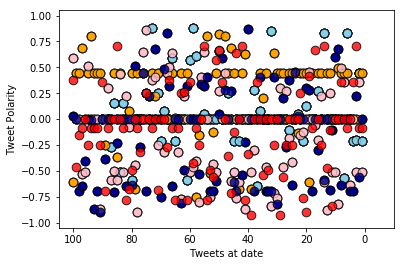

In [16]:
# Create plot
plt.scatter(np.arange(-len(twf[twf["Handle"] == "@BBC"]), 0, 1), 
  twf[twf["Handle"] == "@BBC"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
  alpha=0.8, label="BBC")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets at date")
plt.xlim([-105, 10])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@BBC"]), 0, 1), 
  twf[twf["Handle"] == "@BBC"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
  alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@CBS"]), 0, 1), 
  twf[twf["Handle"] == "@CBS"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="orange", s=75,
  alpha=0.8, label="@CBS")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@CNN"]), 0, 1), 
  twf[twf["Handle"] == "@CNN"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="pink", s=75,
  alpha=0.8, label="@CNN")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@FoxNews"]), 0, 1), 
  twf[twf["Handle"] == "@FoxNews"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="darkblue", s=75,
  alpha=0.8, label="@FoxNews")


plt.scatter(np.arange(-len(twf[twf["Handle"] == "@nytimes"]), 0, 1), 
  twf[twf["Handle"] == "@nytimes"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="red", s=75,
  alpha=0.8, label="@nytimes")



plt.show()

In [29]:
twf.groupby("Handle").mean()




Compound_Score  Positive_score  Negative_score  Neutral_score
Handle                                                                 
@BBC           -0.033553        0.012890        0.022320       0.964800
@CBS            0.026314        0.065364        0.050761       0.883875
@CNN           -0.050813        0.070010        0.091670       0.838310
@FoxNews        0.005228        0.111930        0.087020       0.801040
@nytimes       -0.169650        0.048020        0.098310       0.853660

In [30]:
%matplotlib inline


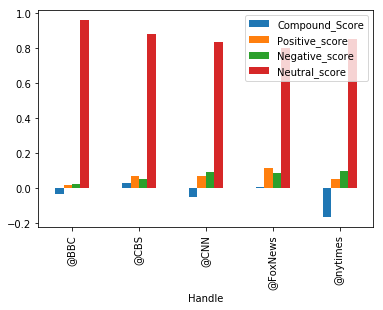

In [31]:
twf.groupby("Handle").mean().plot(kind='bar')

In [21]:
twf.tail()


Handle Date                                               Text  \
480  @nytimes   59  RT @amyep9: Also, @nytimes labeled this photo ...   
481  @nytimes   56  Great response to (yet another) whack @nytimes...   
482  @nytimes   53  @lettieri_mike @thecjpearson @cmg_48 @foxandfr...   
483  @nytimes   48  RT @nytimes: Pope Celebrates Easter Mass With ...   
484  @nytimes   44  How Memphis Gave Up on Dr. King’s Dream   via ...   

     Compound_Score  Positive_score  Negative_score  Neutral_score  
480          0.0000           0.000             0.0          1.000  
481          0.6249           0.272             0.0          0.728  
482          0.0000           0.000             0.0          1.000  
483          0.8020           0.340             0.0          0.660  
484          0.2500           0.167             0.0          0.833